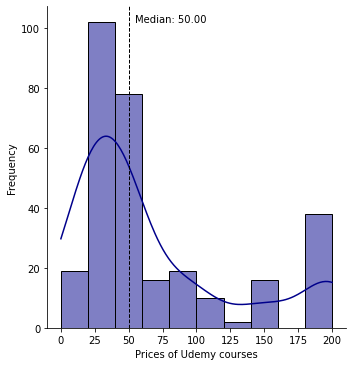

In [199]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np

#imports the dataset using Pandas package 
df = pd.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294344-8770/udemy-courses-sample.csv") 
df.head(20)

#transforms both columns of price of the course and its number of subscribers into lists
price_udemy = df['price'].tolist()
num_subscribers = df['num_subscribers'].tolist()

#plots a histogram of frequency of prices among course with smoothed density function 
sns.displot(price_udemy, kde=True, color = 'darkblue') 
plt.axvline(df['price'].median(), color='k', linestyle='dashed', linewidth=1)
min_y, max_y = plt.ylim() # gets minimum and maximum limit of y-axis and stores in variables

# adds legend to the y-axis of the median line (dashed)
plt.text(df['price'].median()*1.1, max_y*0.95, 'Median: {:.2f}'.format(df['price'].median())) 

# adds label to the graph
plt.xlabel("Prices of Udemy courses")
plt.ylabel("Frequency")
plt.show()


In [200]:
subgroup_one = [] # subgroup one represents the number of subscribers corresponding to low-priced courses
subgroup_two = [] # subgroup two represents the number of subscribers corresponding to high-priced courses

length = len(num_subscribers)
median_price = np.median(price_udemy) 

for i in range(length): 
    if price_udemy[i] < median_price:
        # adds the current number of subscribers of a course to subgroup one if its price is lower than the median of prices
        subgroup_one.append(num_subscribers[i]) 
    else: # if not, adds to subgroup two:
        subgroup_two.append(num_subscribers[i])

50.0


In [238]:
import statistics

n_one = len(subgroup_one)
print("Sample size of subgroup 1:", n_one) # prints the sample size of subgroup one 

mean_one = statistics.mean(subgroup_one)
print("Mean of subgroup 1:", mean_one) # prints the mean of subgroup one 

print("Median of subgroup 1:", statistics.median(subgroup_one)) # prints the median of subgroup one 

std_gone = np.std(subgroup_one)
print("Standard deviation of subgroup 1:", std_gone) # prints the standard deviation of subgroup one 

df_one = n_one - 1 
print("Degrees of freedom of subgroup 1:", df_one) # prints the degrees of freedom of subgroup one 

print("Mode of subgroup 1:", statistics.mode(subgroup_one)) # prints the mode of subscribers of subgroup one 

Sample size of subgroup 1: 145
Mean of subgroup 1: 2728.6275862068965
Median of subgroup 1: 553
Standard deviation of subgroup 1: 9732.547944340895
Degrees of freedom of subgroup 1: 144
Mode of subgroup 1: 1


In [239]:
n_two = len(subgroup_two)
print("Sample size of subgroup 2:", n_two) # prints the sample size of subgroup two 

mean_two = statistics.mean(subgroup_two) # prints the mean of subgroup two 
print("Mean of subgroup 2:", mean_two)

print("Median of subgroup 2:", statistics.median(subgroup_two)) # prints the median of subgroup two 

std_gtwo = np.std(subgroup_two)
print("Standard Deviation of subgroup 2:", std_gtwo) # prints the standard deviation of subgroup two 

df_two = n_two - 1 
print("Degrees of subgroup 2:", df_two) # prints the degrees of freedom of subgroup two 

print("Mode of subgroup 2:", statistics.mode(subgroup_two)) # prints the mode of subscribers of subgroup two 

Sample size of subgroup 2: 155
Mean of subgroup 2: 2858.3548387096776
Median of subgroup 2: 1101
Standard Deviation of subgroup 2: 5096.189518608327
Degrees of subgroup 2: 154
Mode of subgroup 2: 0


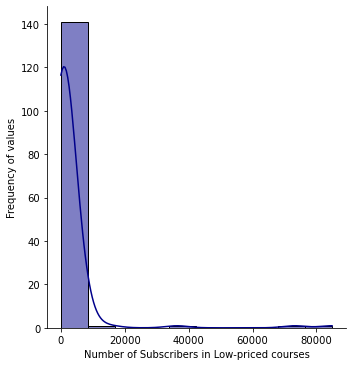

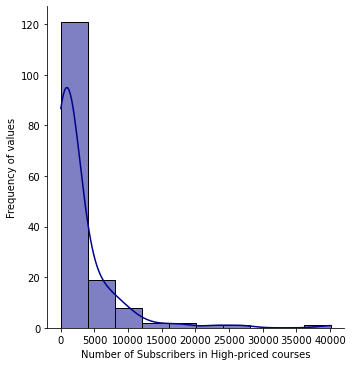

In [213]:
#plots a histogram of frequency of prices for subgroup one among course with smoothed density function
sns.displot(subgroup_one, kde=True, color = 'darkblue', bins = 10) 

#labels y and x-axis
plt.xlabel("Number of Subscribers in Low-priced courses") 
plt.ylabel("Frequency of values")

#plots a histogram of frequency of prices for subgroup two among course with smoothed density function
sns.displot(subgroup_two, kde=True, color = 'darkblue', bins = 10) 

#labels y and x-axis
plt.xlabel("Number of Subscribers in High-priced courses") 
plt.ylabel("Frequency of values")
plt.show()

In [234]:
from scipy import stats
import math


# defines the size of the population and the sample that will be assesed later
population_udemy = 3682
sample_size = 300

mean_difference = mean_one - mean_two # computes the mean difference
print("The mean difference is:", mean_difference)

SE = math.sqrt((std_gone**2/n_one)+(std_gtwo**2/n_two)) # computes the SE of differences of means by its formula
print("The Standard Deviation for the Differences of Means is:", SE)

finite_pop_correction = math.sqrt((population_udemy - sample_size)/(population_udemy - 1)) # computes the FPC by its formula
print("The Finite Population Correction factor is:", finite_pop_correction)

t_score = mean_difference/(SE*finite_pop_correction) # computes t-score by its formula
print("The t-score is:", t_score)

p_value = 1- stats.t.cdf(t_score, df_one + df_two) # computes the p-value using 'stats' library cumulative function
print("The p-value is:", p_value)

if p_value < 0.05: # checks if the p-value is smaller than the alpha for the difference of means to be statistically significant
    print("The Difference of Means is statistically significant!")
else: 
    print("The Difference of Means is NOT statistically significant!")


The mean difference is: -129.72725250278108
The Standard Deviation for the Differences of Means is: 905.9880458531314
The Finite Population Correction factor is: 0.9585259896352851
The t-score is: -0.14938426684049222
The p-value is: 0.5593242638201144
The Difference of Means is NOT statistically significant!


In [243]:
# calculates the critical value using the probability point function with a 95% confidence level 
# uses the percentile and the degrees of freedom of both samples to display the critical value of rejecting or not a hypothesis
critical_value = stats.t.ppf(q=1-.05,df=(df_one + df_two))
                                 
# calculates the confidence interval using the mean difference as the point estimate
confidence_interval = []

upper_bound = mean_difference + (critical_value*SE)
lower_bound = mean_difference - (critical_value*SE)

confidence_interval.append(lower_bound)
confidence_interval.append(upper_bound)
print("The Confidence Interval is:", confidence_interval) # prints the confidence interval

The Confidence Interval is: [-1624.5921046159024, 1365.1375996103402]
